# Optimización

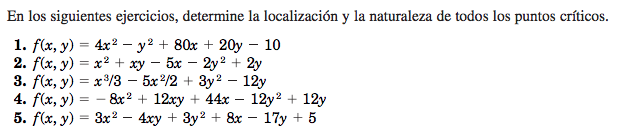

In [1]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
init_printing()
x=var('x')
y=var('y')

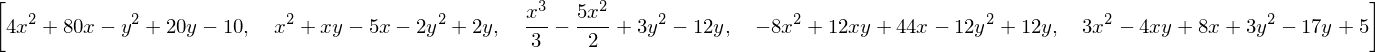

In [2]:
U=[4*x**2-y**2+80*x+20*y-10,x**2+x*y-5*x-2*y**2+2*y,x**3/3-5*x**2/2+3*y**2-12*y,
   -8*x**2+12*x*y+44*x-12*y**2+12*y,3*x**2-4*x*y+3*y**2+8*x-17*y+5]
U

Ejercicio 1


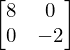

Existen un punto silla en la coordenada:
x= -10 y= 10
Ejercicio 2


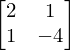

Existen un punto silla en la coordenada:
x= 2 y= 1
Ejercicio 3


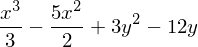

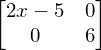

Existen un punto silla en la coordenada:
x= 0 y= 2
Existe un mínimo relativo en el punto:
x= 5 y= 2
Ejercicio 4


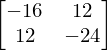

Existe un máximo relativo en el punto:
x= 5 y= 3
Ejercicio 5


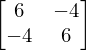

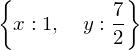

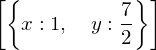

Existe un mínimo relativo en el punto:
x= 1 y= 7/2


In [3]:
i=1
for func in U:
    print("Ejercicio %i"%(i))
    func
    H=hessian(func,[x,y])
    H
    D=H.det()
    D
    gradiente=[func.diff(var) for var in [x,y]]
    gradiente
    pcs=solve(gradiente)
    pcs
    if type(pcs)!= list:
        pcs2=[pcs]
    else:
        pcs2=pcs
    pcs2
    for p in pcs2:
        if D.subs({x:p[x],y:p[y]}) >0 and H[0,0].subs({x:p[x],y:p[y]})<0:
            print("Existe un máximo relativo en el punto:")
            print("x=",p[x],"y=",p[y])
        if D.subs({x:p[x],y:p[y]})>0 and H[0,0].subs({x:p[x],y:p[y]})>0:
            print("Existe un mínimo relativo en el punto:")
            print("x=",p[x],"y=",p[y])
        if D.subs({x:p[x],y:p[y]})<0:
            print("Existen un punto silla en la coordenada:")
            print("x=",p[x],"y=",p[y])
        if D==0:
            print("La prueba es inconclusa")
    i=i+1

6. Una compañía fabrica y venden dos modelos de lámpara L1 y L2. Para su fabricación se necesita un trabajo manual de 20 minutos para el modelo L1 y de 30 minutos para el L2; y un trabajo de máquina para L1 y de 10 minutos para L2. Se dispone para el trabajo manual de 100 horas al mes y para la máquina 80 horas al mes. Sabiendo que el beneficio por unidad es de 15 y 10 euros para L1 y L2, respectivamente, planificar la producción para obtener el máximo beneficio.

In [71]:
from pulp import *

In [72]:
#Se puede poner LpInteger o LpContinuous
prob=LpProblem("Problema fabrica",LpMaximize)
l1=LpVariable("Lampara 1",0,None,LpInteger)
l2=LpVariable("Lampara 2",0,None,LpInteger)

In [73]:
prob+= 15*l1+10*l2 , "Beneficio total"

In [74]:
#constricciones
prob+= 20*l1+30*l2<= 100*60 ,"Máximo de trabajo manual"
prob+= 20*l1+10*l2<=80*60, "Máximo de trabajo de maquina"

In [75]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [76]:
for x in prob.variables():
    print(x.name,"=",x.varValue)

Lampara_1 = 210.0
Lampara_2 = 60.0


7. Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente. ¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

In [77]:
prob2=LpProblem("Problema fabrica",LpMaximize)
b1=LpVariable("bloque 1",0,None,LpInteger)
b2=LpVariable("bloque 2",0,None,LpInteger)

In [78]:
prob2+= 6.5*b1+7*b2 , "Beneficio total"

In [79]:
#constricciones
prob2+= 2*b1+3*b2<=600 ,"Máximo de cuadernos"
prob2+= 1*b1+1*b2<=500, "Máximo de carpetas"
prob2+= 2*b1+1*b2<=400, "Máximo de bolígrafos"

In [80]:
prob2.solve()
print("Status:", LpStatus[prob2.status])

Status: Optimal


In [81]:
for x in prob2.variables():
    print(x.name,"=",x.varValue)

bloque_1 = 150.0
bloque_2 = 100.0


8. En una granja de pollos se da una dieta, para engordar, con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentra dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [82]:
prob3=LpProblem("Problema granja",LpMinimize)
sX=LpVariable("sustancia X",0,None,LpContinuous)
sY=LpVariable("sustancia Y",0,None,LpContinuous)

In [83]:
prob3+= 10*sX+30*sY , "Costo total"

In [84]:
#constricciones
prob3+= sX+5*sY>=15, "Unidades necesarias de sustancia A"
prob3+= 5*sX+sY>=15, "Unidades necesarias de sustancia B"

In [85]:
prob3.solve()
print("Status:", LpStatus[prob3.status])

Status: Optimal


In [86]:
for x in prob3.variables():
    print(x.name,"=",x.varValue)

sustancia_X = 2.5
sustancia_Y = 2.5


9. Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €. ¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

In [87]:
prob4=LpProblem("Problema pastillas",LpMaximize)
g=LpVariable("Pastilla grande",3,None,LpInteger)
p=LpVariable("Pastilla pequeña",6,None,LpInteger)

In [88]:
prob4+= 2*g+p , "Beneficio total"

In [89]:
#constricciones
prob4+= 40*g+30*p <=600 , "Límite de gramos"

In [90]:
prob4.solve()
print("Status:", LpStatus[prob4.status])

Status: Optimal


In [91]:
for x in prob4.variables():
    print(x.name,"=",x.varValue)

Pastilla_grande = 10.0
Pastilla_pequeña = 6.0


10. Una escuela prepara una excursión para 400 alumnos. La empresa de transporte tiene 8 autobuses de 40 plazas y 10 de 50 plazas, pero sólo dispone de 9 conductores. El alquiler de un autocar grande cuesta 800 € y el de uno pequeño 600 €. Calcular cuántos autobuses de cada tipo hay que utilizar para que la excursión resulte lo más económica posible para la escuela.

In [92]:
prob5=LpProblem("Problema excursión",LpMinimize)
autog=LpVariable("auto grande",0,None,LpInteger)
autop=LpVariable("auto pequeño",0,None,LpInteger)

In [93]:
prob5+= 800*autog+600*autop , "costo total"

In [94]:
#constricciones
prob5+= 50*autog+40*autop>=400 , "Cantidad necesaria de plazas"
prob5+= autog+autop<=9 , "Límite de conductores"

In [95]:
prob5.solve()
print("Status:", LpStatus[prob5.status])

Status: Optimal


In [96]:
for x in prob5.variables():
    print(x.name,"=",x.varValue)

auto_grande = 4.0
auto_pequeño = 5.0


11. Nota: El peso de una persona se puede adivinar, en parte, por su altura. Los siguientes datos muestran su descriptiva en 30 individuos (ejemplo simulado).


- Genera una grafica de la mejor curva que se ajuste a esos datos.
- ¿Cuál es el peso aproximado de una persona con una altura de 195 cm?

In [97]:
import numpy as np

np.random.seed(12345)
altura = np.random.normal(171,10,30) # rnorm(30,171,8) # Generar la altura
peso = altura-100+ np.random.normal(0,10,30) # Generar el peso

In [98]:
from scipy.stats import linregress

In [99]:
ctes=linregress(altura, peso)
linregress(altura,peso) #Dentro de Scipy

In [100]:
punto_x=float(input("Ingrese altura para predecir peso"))
punto_y=ctes.intercept+ctes.slope*punto_x
print("La coordenada del punto buscado es altura= ",punto_x," peso= ",punto_y)

Ingrese altura para predecir peso195
La coordenada del punto buscado es altura=  195.0  peso=  88.84307184051069


<IPython.core.display.Javascript object>


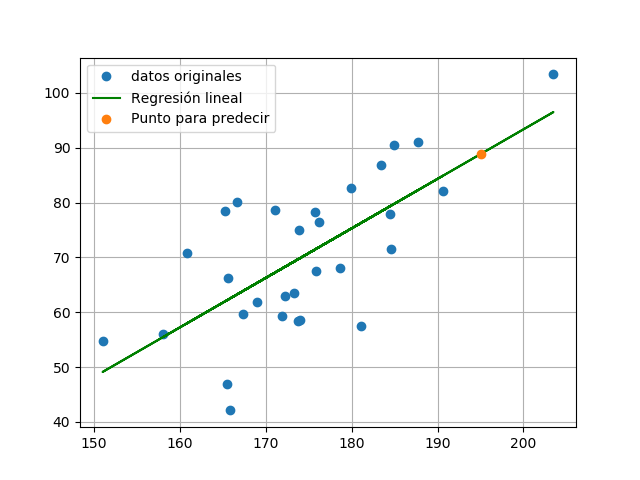

In [101]:
a=plt.plot(altura, peso, 'o', label='datos originales')
a=plt.plot(altura, ctes.intercept+ctes.slope*altura, 'g', label='Regresión lineal')
a=plt.plot(punto_x,punto_y,"o",label='Punto para predecir')
a=plt.legend()
a=plt.grid()
plt.show()

12. El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [102]:
import os
import pandas as pd

marketing = pd.read_csv(os.path.join('datasets','banking.csv'))
print(marketing.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [103]:
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [104]:
labels = marketing.y.values
features = marketing[['age', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed']]

In [105]:
features.head(8)

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2
5,30,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
6,37,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
7,39,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1


In [106]:
pd.get_dummies(features).head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [107]:
features_dummies =pd.get_dummies(features,columns=['campaign','previous','month','day_of_week','previous','poutcome','default','housing','loan','marital','education','contact'])
features_dummies.head(10)

,age,duration,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,campaign_1,campaign_2,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone
0,44,210,999,1.4,93.444,-36.1,4.963,5228.1,1,0,...,1,0,0,0,0,0,0,0,1,0
1,53,138,999,-0.1,93.200,-42.0,4.021,5195.8,1,0,...,0,0,0,0,0,0,0,1,1,0
2,28,339,6,-1.7,94.055,-39.8,0.729,4991.6,0,0,...,0,0,0,0,0,0,1,0,1,0
3,39,185,999,-1.8,93.075,-47.1,1.405,5099.1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,55,137,3,-2.9,92.201,-31.4,0.869,5076.2,1,0,...,1,0,0,0,0,0,0,0,1,0
5,30,68,999,1.4,93.918,-42.7,4.961,5228.1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,37,204,999,-1.8,92.893,-46.2,1.327,5099.1,1,0,...,1,0,0,0,0,0,0,0,1,0
7,39,191,999,-1.8,92.893,-46.2,1.313,5099.1,1,0,...,0,0,1,0,0,0,0,0,1,0
8,36,174,3,-2.9,92.963,-40.8,1.266,5076.2,1,0,...,0,0,0,0,0,0,1,0,1,0
9,27,191,999,-1.8,93.075,-47.1,1.410,5099.1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [108]:
data = features_dummies.values

In [109]:
data[0]

array([ 4.4000e+01,  2.1000e+02,  9.9900e+02,  1.4000e+00,  9.3444e+01,
       -3.6100e+01,  4.9630e+00,  5.2281e+03,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.00

In [110]:
import numpy as np
np.isnan(data).any()

False

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

train_data, test_data, train_labels, test_labels = train_test_split(data,labels,random_state=0)

imp=Imputer()
imp.fit(train_data)
train_data_finite=imp.transform(train_data)
test_data_finite=imp.transform(test_data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [112]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(train_data_finite,train_labels)
print("logistic regression score: %f" % 
      lr.score(test_data_finite, test_labels))

logistic regression score: 0.912887


In [113]:
features_dummies.columns

Index(['age', 'duration', 'pdays', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'campaign_1', 'campaign_2',
       ...
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone'],
      dtype='object', length=107)